In [2]:
import pandas as pd 
import os 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import svm 
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score 
import cv2

from sklearn.metrics import classification_report
import image
from PIL import Image

Initialiser ce qui pourrait être utile

In [3]:
IMGSIZE=200                                                                     #taille normalisée 
Categories=['orange','Violet','red','Blue','Green','Black','Brown','White']     #étiquettes
flat_data_arr=[np.zeros(IMGSIZE*IMGSIZE*3)]                                     #tableau des images
target_arr=[]                                                                   #tableau des étiquettes 
datadir='ColorClassification/'                                                  #chemin de la bas

Charger et normaliser les images de la base

In [4]:
for i in Categories:
    print(f'loading... category : {i}') 
    path=os.path.join(datadir,i) 
    for img in os.listdir(path): 
        img_array=plt.imread(os.path.join(path,img)) 
        img_resized=np.resize(img_array,(IMGSIZE,IMGSIZE,3)) 
        flat_data_arr=np.append(flat_data_arr, [img_resized.flatten()], axis=0)
        target_arr.append(Categories.index(i)) 
    print(f'loaded category:{i} successfully')


loading... category : orange
loaded category:orange successfully
loading... category : Violet
loaded category:Violet successfully
loading... category : red
loaded category:red successfully
loading... category : Blue
loaded category:Blue successfully
loading... category : Green
loaded category:Green successfully
loading... category : Black
loaded category:Black successfully
loading... category : Brown
loaded category:Brown successfully
loading... category : White
loaded category:White successfully


In [5]:
flat_data_arr=flat_data_arr[1:]
flat_data = np.asarray(flat_data_arr, dtype=np.uint8)
target=np.array(target_arr) 

Convertir en Data Frame

In [6]:
df=pd.DataFrame(flat_data)  
df['Target']=target 
df.shape

(151, 120001)

Séparer les données en données d'entrées et données de sorties

In [7]:
#input data (toutes les colonnes sauf la dernière)
x=df.iloc[:,:-1]  
#output data (dernière colonne)
y=df.iloc[:,-1]

#x et y seront utiliser pour former un modèle d'apprentissage automatique

Séparer en base de test et base d'entraînement

In [8]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20, random_state=77, stratify=y) 

Définition de la grille de paramètre

In [9]:
param_grid={'C':[0.1,1,10,100], 'gamma':[0.0001,0.001,0.1,1], 'kernel':['rbf','poly']} #inutilisé

Création d'un classifier SVM

In [10]:
svc=svm.SVC(probability=True) 

Création d'un modèle utilisant GridSearchCV avec param_grid pour trouver les meilleurs hyperparamètres

In [11]:
model=GridSearchCV(svc,param_grid) # inutilisé

Entraîner le modèle

In [12]:
svc.fit(x_train,y_train)

SVC(probability=True)

In [13]:
# Tester le modèle en utilisant les données de test
y_pred = svc.predict(x_test) 
  
# Calculer la précision du modèle
accuracy = accuracy_score(y_pred, y_test) 
  
# Afficher la précision du modèle 
print(f"The model is {accuracy*100}% accurate")

The model is 80.64516129032258% accurate


In [14]:
result = pd.DataFrame({'original' : y_test,'predicted' : y_pred})
result

,original,predicted
122,6,6
47,2,2
105,5,5
98,5,5
11,0,0
22,1,7
132,7,7
0,0,0
41,2,6
124,7,1


In [15]:
nl=np.zeros(len(Categories))
for i in result.index:
    if result['original'][i]!=result['predicted'][i]:
        nl[result['original'][i]]+=1
#        print(result['original'][i])
np.vstack((Categories,nl))

array([['orange', 'Violet', 'red', 'Blue', 'Green', 'Black', 'Brown',
        'White'],
       ['1.0', '2.0', '1.0', '0.0', '1.0', '0.0', '0.0', '1.0']],
      dtype='<U32')

In [16]:
#print(classification_report(y_test, y_pred,target_names=Categories))

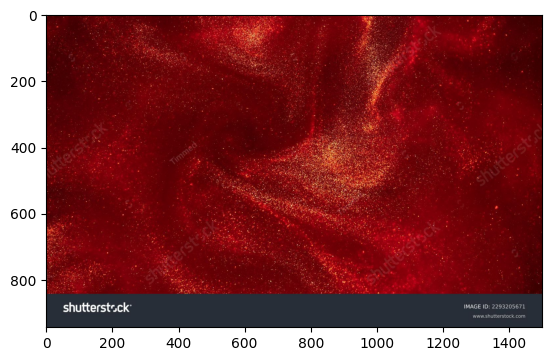

orange = 1.8552165305772534%
Violet = 2.3033889354776513%
red = 46.735948009467734%
Blue = 0.8717809601513193%
Green = 1.3020840474273443%
Black = 5.015859837238248%
Brown = 39.101950934797046%
White = 2.8137707448634206%
The predicted image is : Brown


In [18]:
#path='ColorClassification/Orange/2.jpg'
path='ColorClassification2/photo.jpg'
img=plt.imread(path) 
plt.imshow(img) 
plt.show() 
img_resize=np.resize(img,(IMGSIZE,IMGSIZE,3)) 
l=[img_resize.flatten()] 
probability=svc.predict_proba(l) 
for ind,val in enumerate(Categories): 
    print(f'{val} = {probability[0][ind]*100}%') 
print("The predicted image is : "+Categories[svc.predict(l)[0]])

In [19]:
path='ColorClassification/testimg'
ml=np.zeros(len(Categories))
t=[13.0,12.0,12.0,11.0,13.0,12.0,0.0,11.0]
for img in os.listdir(path):
    img=plt.imread(os.path.join(path,img)) 
    #plt.imshow(img) 
    #plt.show() 
    img_resize=np.resize(img,(IMGSIZE,IMGSIZE,3)) 
    l=[img_resize.flatten()] 
    probability=svc.predict_proba(l) 
    #for ind,val in enumerate(Categories): 
    #    print(f'{val} = {probability[0][ind]*100}%') 
    #print("The predicted image is : "+Categories[svc.predict(l)[0]])
    ml[svc.predict(l)[0]]+=1
m=np.vstack((Categories,t))
np.vstack((m,ml))

array([['orange', 'Violet', 'red', 'Blue', 'Green', 'Black', 'Brown',
        'White'],
       ['13.0', '12.0', '12.0', '11.0', '13.0', '12.0', '0.0', '11.0'],
       ['21.0', '11.0', '10.0', '9.0', '13.0', '16.0', '1.0', '15.0']],
      dtype='<U32')

In [92]:
svc.predict(l)

In [131]:
probability*100

In [92]:
type(probability)

In [71]:
probability[0].index(np.max(probability))

In [71]:
probability[0]